In [106]:
import numpy as np 
import pandas as pd 
import random 

In [107]:
pmf = []
for i in range(1000):
    pmf.append(random.randint(1,6))

pmf = pd.Series(pmf)
pmf

0      2
1      2
2      4
3      3
4      1
      ..
995    1
996    2
997    6
998    4
999    2
Length: 1000, dtype: int64

In [108]:
pmf  = (pmf.value_counts()/pmf.value_counts().sum()).sort_index()
pmf

1    0.175
2    0.172
3    0.168
4    0.155
5    0.157
6    0.173
Name: count, dtype: float64

<Axes: >

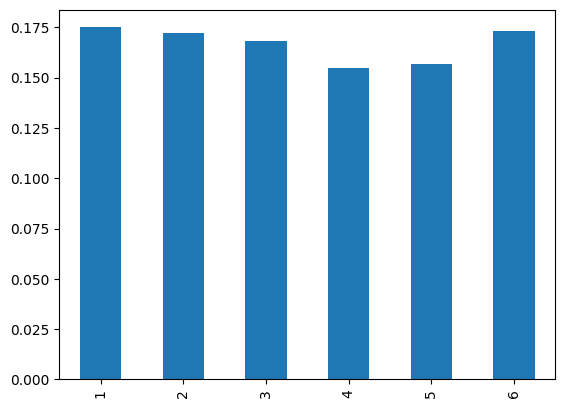

In [109]:
pmf.plot(kind = 'bar')

In [110]:
# pmf for 2 dice sum 
pmf2 = []
for i in range(1000):
    pmf2.append(random.randint(1,6) + random.randint(1,6))
pmf2 = pd.Series(pmf2)

In [111]:
pmf2 =(pmf2.value_counts()/ pmf2.value_counts().sum()).sort_index()
pmf2

2     0.029
3     0.057
4     0.090
5     0.115
6     0.138
7     0.167
8     0.136
9     0.120
10    0.065
11    0.056
12    0.027
Name: count, dtype: float64

<Axes: >

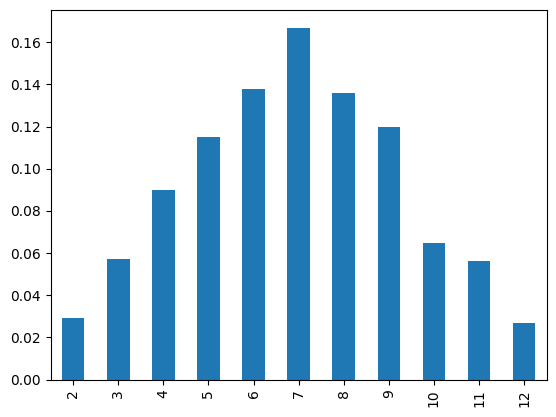

In [112]:
pmf2.plot(kind = 'bar')

In [113]:
#cdf of a pmf 
cdf  = np.cumsum(pmf)
cdf

1    0.175
2    0.347
3    0.515
4    0.670
5    0.827
6    1.000
Name: count, dtype: float64

<Axes: >

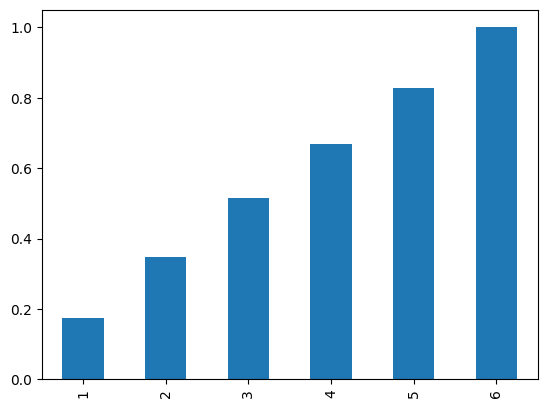

In [114]:
cdf.plot(kind = 'bar')

# Probability density function 